# K-Means

## 1. Implementando K-Means en Python con Sklearn

Agrupar usuarios de Twitter de acuerdo a su personalidad con K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import os

In [2]:
data_rute = os.path.join('..', '..', 'analisis.csv')
dataframe = pd.read_csv(data_rute)
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


array([[<Axes: title={'center': 'op'}>, <Axes: title={'center': 'co'}>],
       [<Axes: title={'center': 'ex'}>, <Axes: title={'center': 'ag'}>],
       [<Axes: title={'center': 'ne'}>,
        <Axes: title={'center': 'wordcount'}>]], dtype=object)

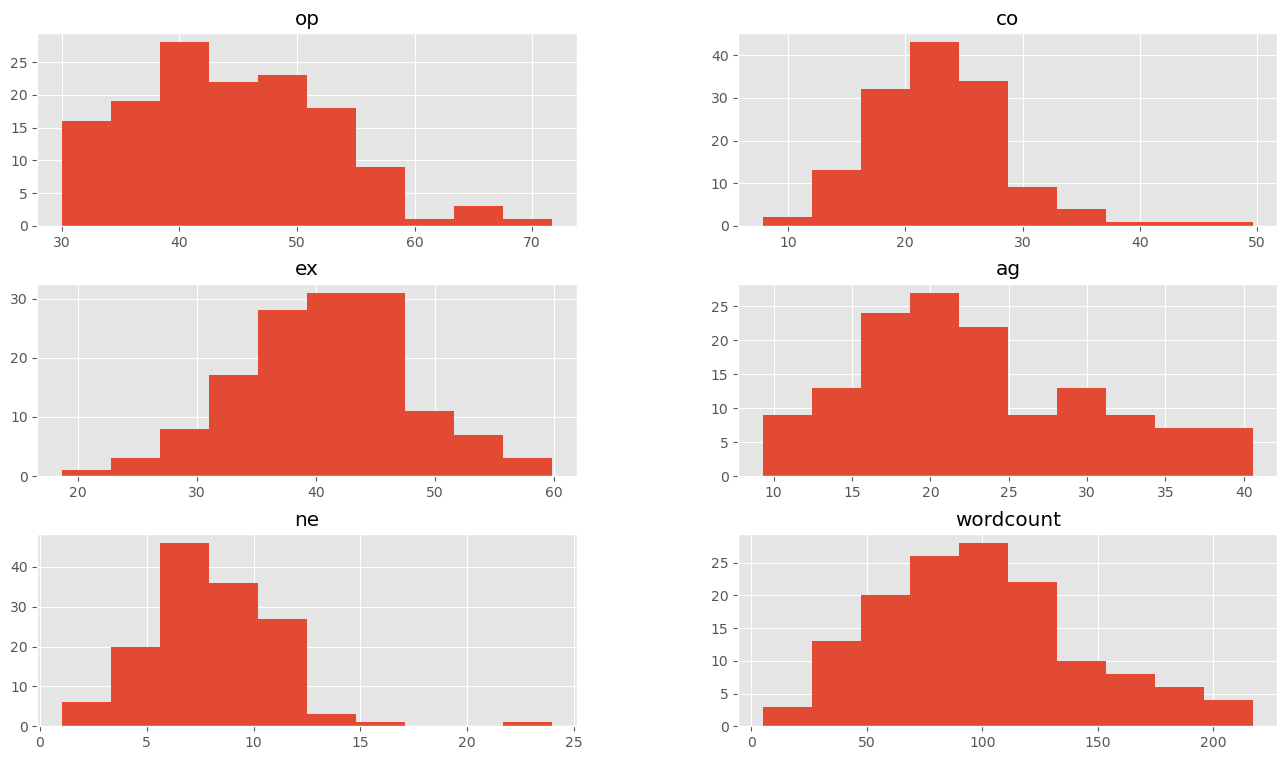

In [5]:
dataframe.drop(['categoria'], axis=1).hist()

c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf value

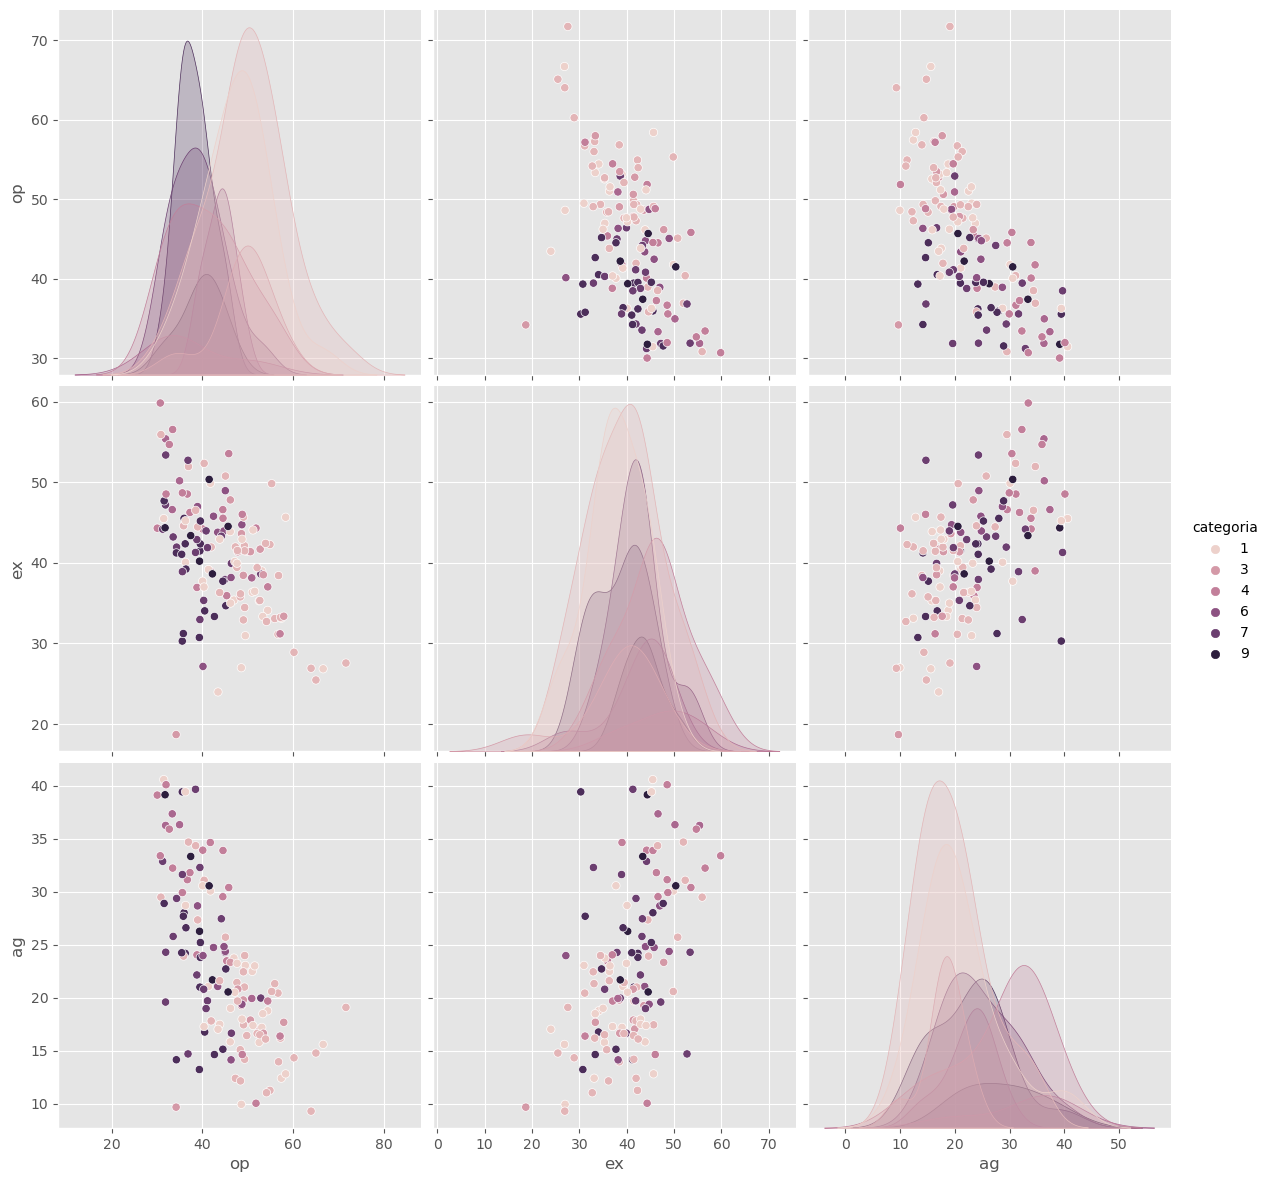

In [6]:
sb.pairplot(
    dataframe.dropna(),
    hue='categoria',
    size=4,
    vars=['op', 'ex', 'ag'],
    kind='scatter'
)

## 2. Definimos la entrada

In [7]:
X = np.array(dataframe[['op', 'ex', 'ag']])
y = np.array(dataframe['categoria'])
X.shape

fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)

<Figure size 1600x900 with 0 Axes>

## 3. Obtener el valor de K

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]


c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

[-25194.039352766315, -12632.03153694523, -9973.486740349108, -8366.287070769531, -6961.310458067878, -6083.24013718635, -5572.311787549582, -5029.850898268927, -4562.660695046905, -3942.3054038454106, -3606.447353613605, -3476.355513553074, -3198.4463077112996, -3005.550675446462, -2750.766205377114, -2693.287024450901, -2608.5142852603467, -2439.851175995203, -2293.791816014095]


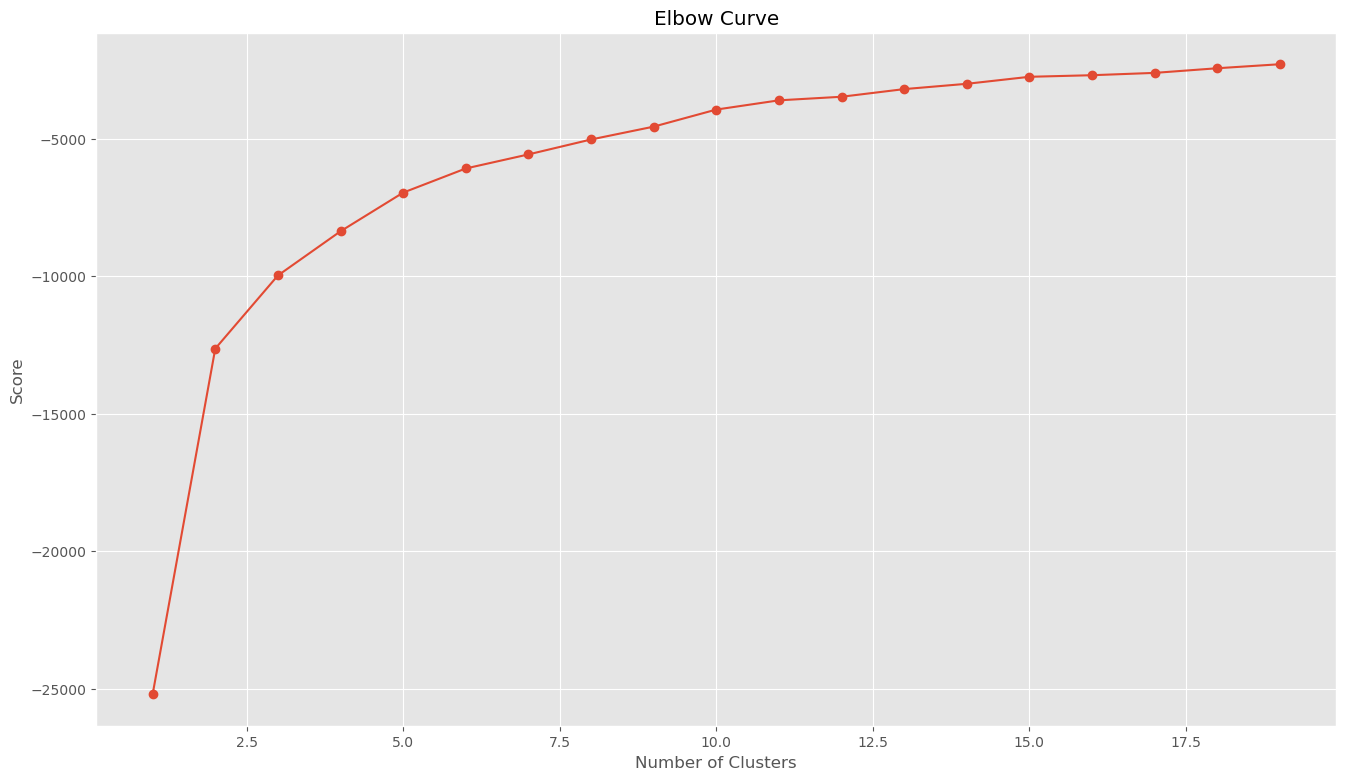

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)

plt.plot(Nc, score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

## 4. Ejecutamos K-Means

In [12]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pepel\.conda\envs\PySpace310\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[42.73275924 33.0308789  21.11743814]
 [35.80703706 47.6507045  33.91511891]
 [39.59124977 43.8789952  23.78707927]
 [57.92200861 31.5039735  15.67199517]
 [49.85887044 41.15660338 17.54193885]]


In [13]:
# Predicting the clusters
labels = kmeans.predict(X)

# Getting the cluster centers
C = kmeans.cluster_centers_
colores = ['red', 'green', 'blue', 'cyan', 'yellow']
asignar = []
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar, s=60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>